In [1]:
import pandas as pd

In [2]:
harmonic = pd.read_parquet('synthetic_data_parquet/harmonic_dataset.parquet')

In [67]:
import numpy as np
from PIL import Image, ImageDraw

def draw_line(data, size: int = 80) -> Image:
    '''
    Draws a line graph from the data and normalizes each column to sum to 255.

    Parameters:
    -----------
    data: array-like
        The data to be plotted. It should be a 1D array or list.
    size: int
        The side size of the image to be created. Default is 80.
    
    Returns:
    -----------
    Image
        A PIL Image object representing the line graph.
    '''

    if not hasattr(data, '__iter__'):
        raise ValueError("Input data must be an iterable (e.g., list, numpy array).")
    if len(data) == 0:
        raise ValueError("Input data cannot be empty.")
    if not isinstance(size, int) or size <= 0:
        raise ValueError("Size must be a positive integer.")
    
    data = np.array(data)

    if data.ndim != 1:
        raise ValueError("Input data must be a 1D array.")

    x_vals = np.linspace(0, size - 1, len(data))
    y_min, y_max = np.min(data), np.max(data)
    y_vals = (1 - (data - y_min) / (y_max - y_min)) * (size - 1)
    img = Image.new("L", (size, size), "black")
    draw = ImageDraw.Draw(img)

    for i in range(len(x_vals) - 1):
        x1, y1 = x_vals[i], y_vals[i]
        x2, y2 = x_vals[i + 1], y_vals[i + 1]
        draw.line((x1, y1, x2, y2), fill="white")
    
    arr = np.array(img)
    normalized_arr = np.uint8((arr / arr.sum(axis=0))*255)

    normalized_img = Image.fromarray(normalized_arr, 'L')
    return normalized_img

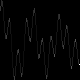

In [77]:
draw_line(harmonic.loc[50], 80)

In [66]:
np.array([1,2,3,4,5]).dtype

dtype('int64')